# Analyse des Upload-Verhaltens

Im Nachfolgenden soll das Upload-Verhalten des Nachrichtensenders *NTV* analysiert werden. Dabei wird zunächst das Verhalten allgemein, also unabhängig der Kategorien betrachtet. Anschließend wird das Upload-Verhalten innerhalb der einzelnen Kategorien analysiert.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
articles_data = pd.read_csv('2-1-data.csv')
articles = pd.DataFrame(articles_data)
articles = articles.drop('filename', axis=1)
articles.head()

,date,time,category,headline,text
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...


Dazu wird zunächst das Dataframe um die Spalte *upload* erweitert. Darin wird die Uhrzeit und das Upload-Datum in eine Pandas-Datetime konvertiert und eingefügt. Mit dieser kann anschließend leichter weiter gearbeitet werden. Da es einige wenige Artikel gibt, bei welchen kein Upload-Datum bzw. Uhrzeit existiert, sollen diese herausgefiltert werden. Artikel, bei denen diese Attribute nicht gefüllt sind können nicht sinnvoll in die Statistik aufgenommen werden.

In [3]:
articles['upload'] = pd.to_datetime(articles['time'] + ' ' + articles['date'])
articles = articles.dropna()
articles.head()

,date,time,category,headline,text,upload
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00


Da nachfolgend die Upload-**Stunde** untersucht werden soll, wird diese extrahiert und als zusätzliche Spalte aufgenommen. Diese wird aus der *upload*-Spalte genommen und in einen Integer umgewandelt.

In [4]:
articles['upload-hour'] = articles['upload'].dt.hour
articles['upload-hour'] = articles['upload-hour'].astype(int)
articles.head()

,date,time,category,headline,text,upload,upload-hour
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15


Außerdem soll das Dataframe um die Spalten `weekday` ergänzt werden.

In [5]:
articles['weekday'] = articles['upload'].dt.dayofweek
wochentag_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
articles['weekday'] = articles['weekday'].map(wochentag_map)
articles.head()

,date,time,category,headline,text,upload,upload-hour,weekday
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17,Friday
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17,Friday
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19,Friday
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8,Friday
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15,Friday


## Analyse unabhängig der Kategorien

Gestartet werden soll mit der Darstellung der Uploads pro Stunde des Tages.

In [6]:
def uploads_per_hour(articles):
    uploads_per_hour = articles['upload-hour'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(uploads_per_hour.index, uploads_per_hour.values, marker='o', linestyle='-', color='b')
    plt.title('Uploads per hour')
    plt.xlabel('Hour of day')
    plt.ylabel('Uploads')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

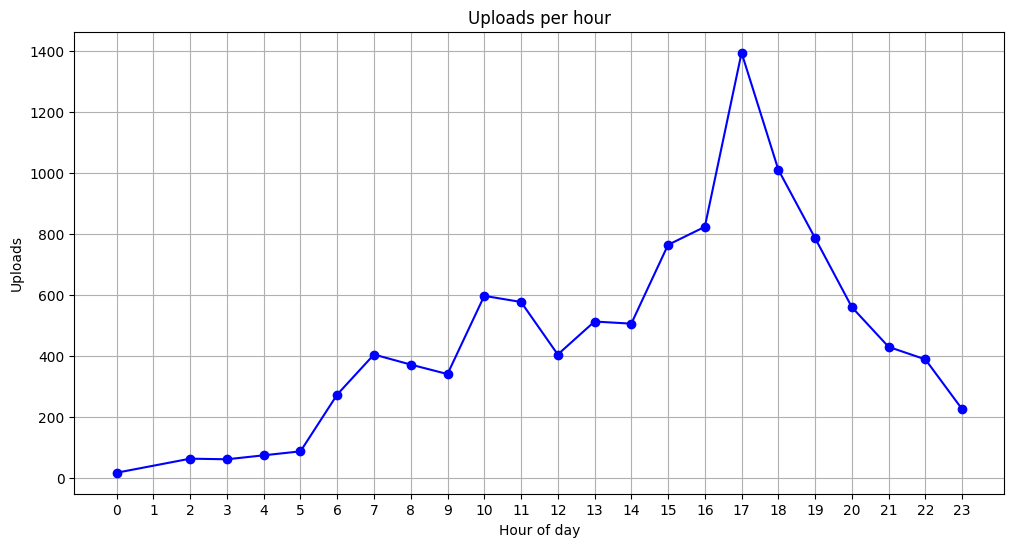

In [7]:
uploads_per_hour(articles)

Ebenso können die Uploads pro Wochentag untersucht werden.

In [8]:
def uploads_per_weekday(articles):
    uploads_per_weekday = articles['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    plt.figure(figsize=(12, 6))
    plt.plot(uploads_per_weekday.index, uploads_per_weekday.values, marker='o', linestyle='-', color='b')
    plt.title('Anzahl der Uploads pro Wochentag')
    plt.xlabel('Wochentag')
    plt.ylabel('Anzahl der Uploads')
    plt.grid(True)
    plt.show()

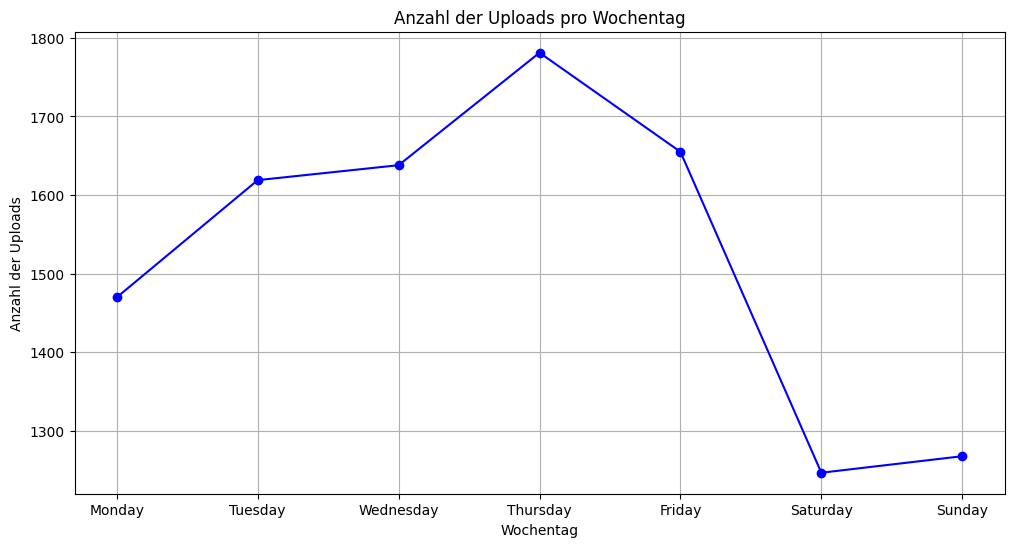

In [9]:
uploads_per_weekday(articles)

## Analyse abhängig von Kategorien

Es wird nun betrachtet zu welcher Stunde in den jeweiligen Kategorien die meisten Uploads stattgefunden haben.

In [10]:
def create_heatmap_plots_for_hours_per_category(articles):
    upload_counts = articles.groupby(['category', 'upload-hour']).size().unstack(fill_value=0)
    for category in upload_counts.index:
        plt.figure(figsize=(24, 1))
        sns.heatmap(upload_counts.loc[[category]], annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
        plt.title(f'Upload pro Stunde für die Kategorie: {category}')
        plt.xlabel('Stunde des Tages')
        plt.yticks([])
        plt.show()

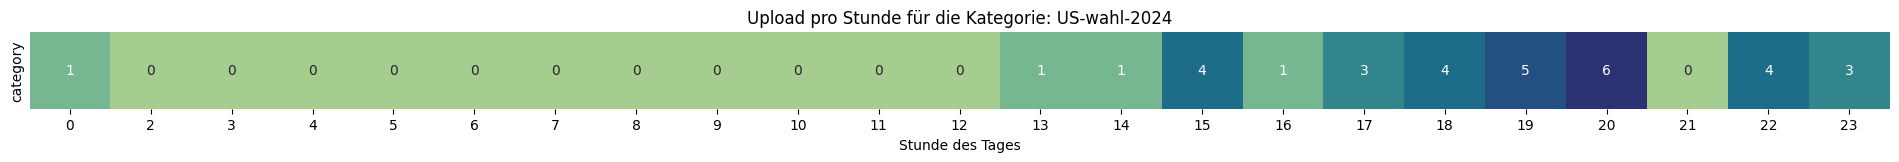

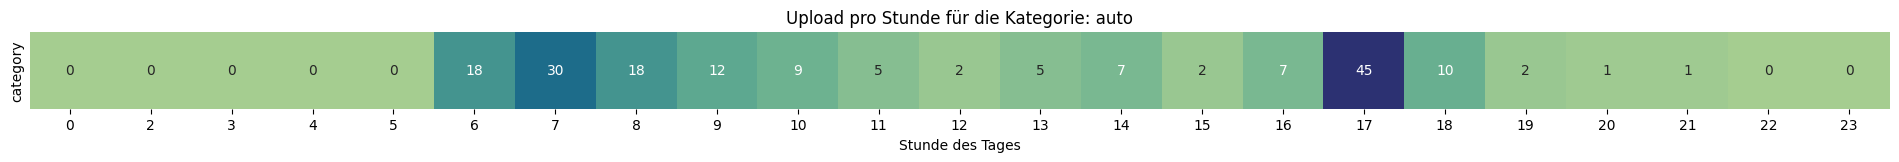

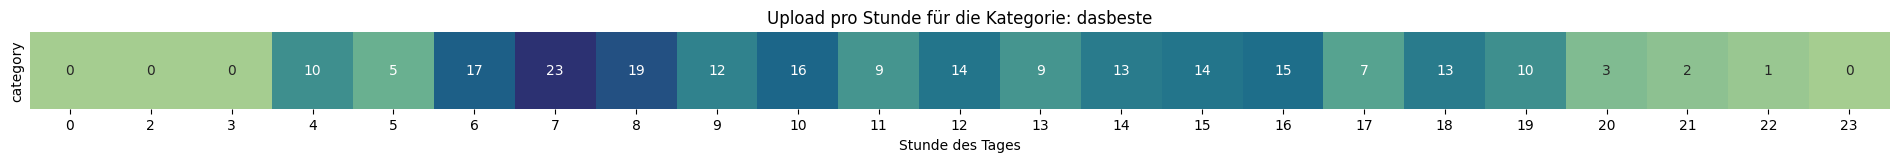

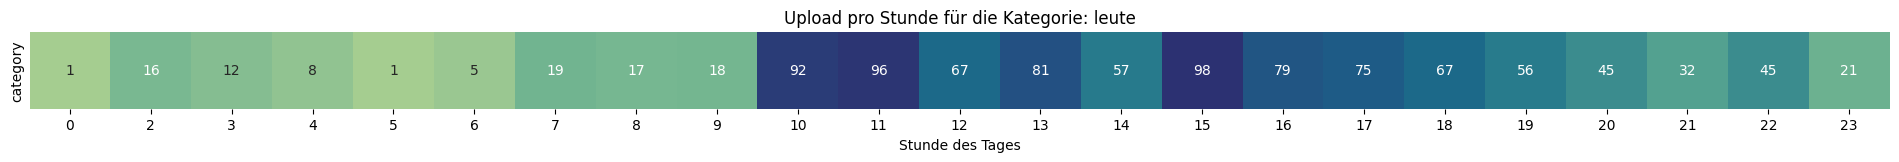

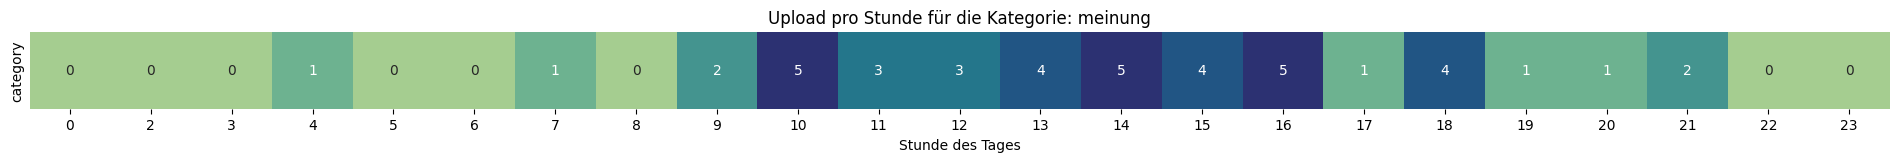

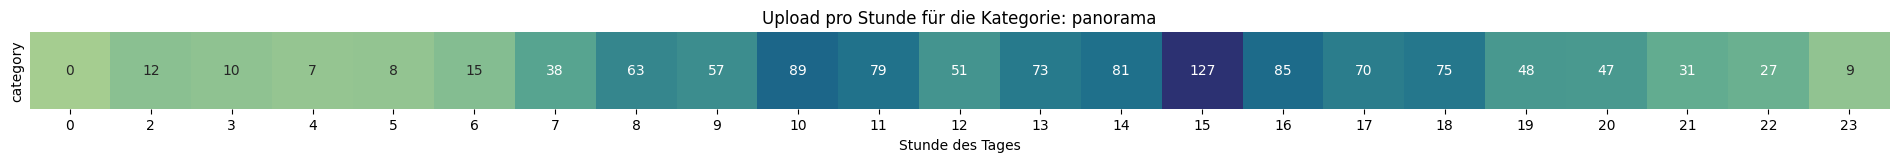

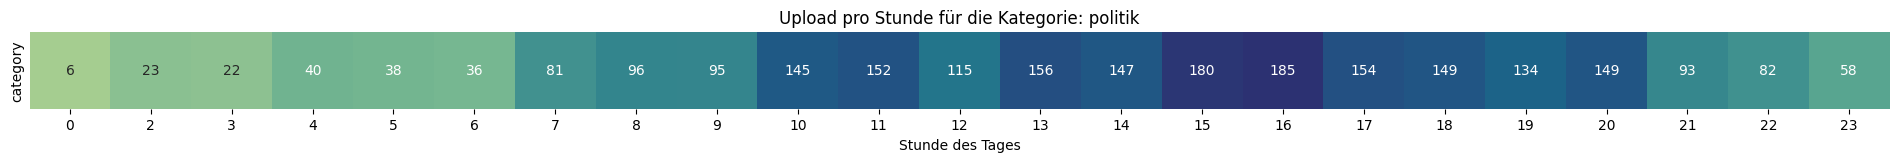

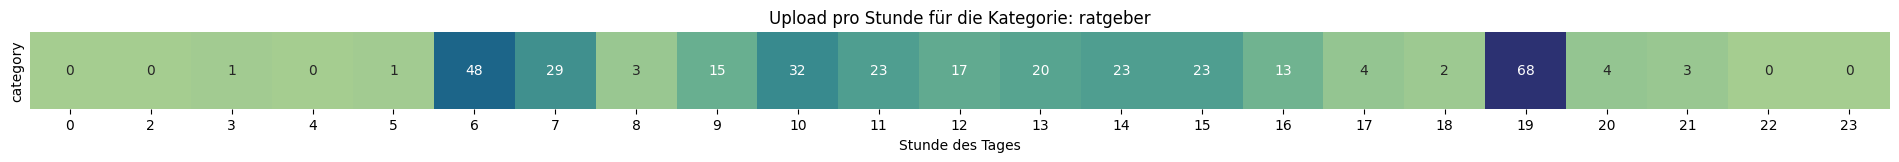

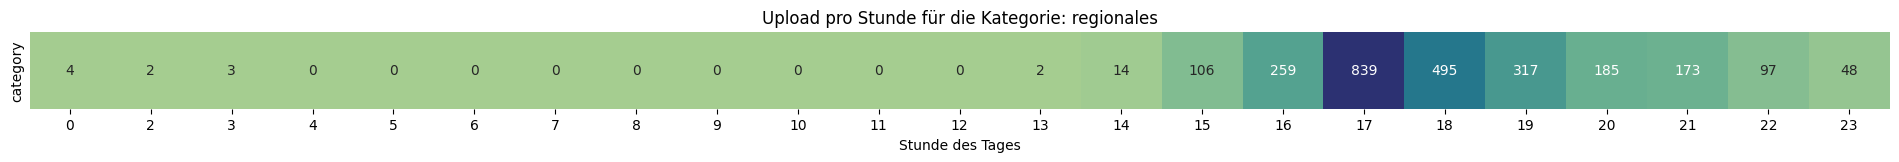

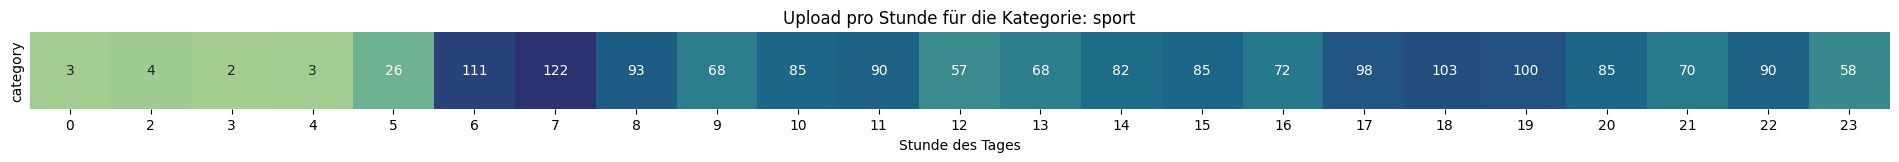

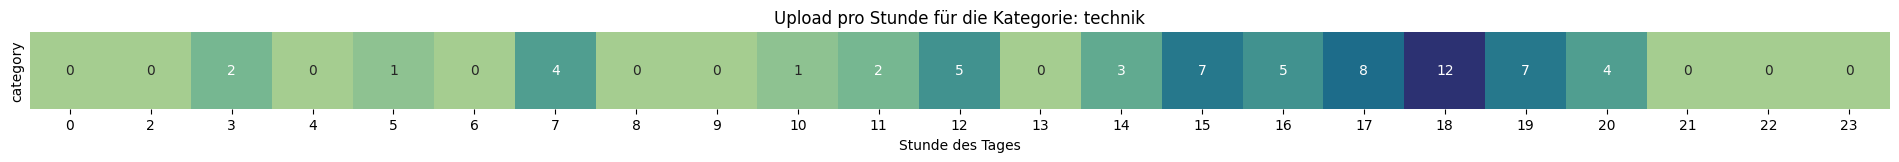

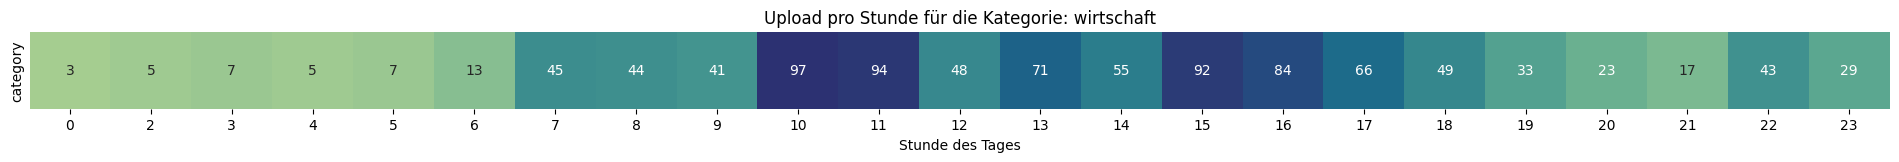

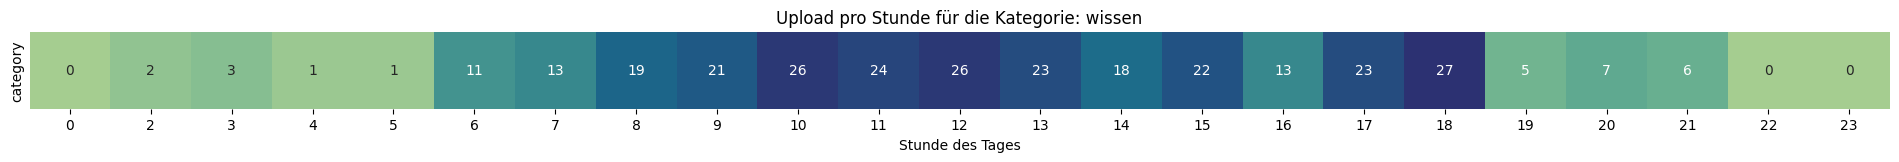

In [11]:
create_heatmap_plots_for_hours_per_category(articles)

Skaliert und vereint sehen die obigen Daten anschließend wie folgt aus:

In [12]:
def create_heatmap_plots_for_articles_per_hour_unified(articles):
    heatmap_data = articles.groupby(['category', 'upload-hour']).size().unstack(fill_value=0)
    scaled_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(10, 6))
    sns.heatmap(scaled_heatmap_data, annot=False, cbar=False, rasterized=True, cmap="crest")
    plt.title('Upload-Verhalten nach Kategorie und Stunde')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Kategorie')
    plt.show()

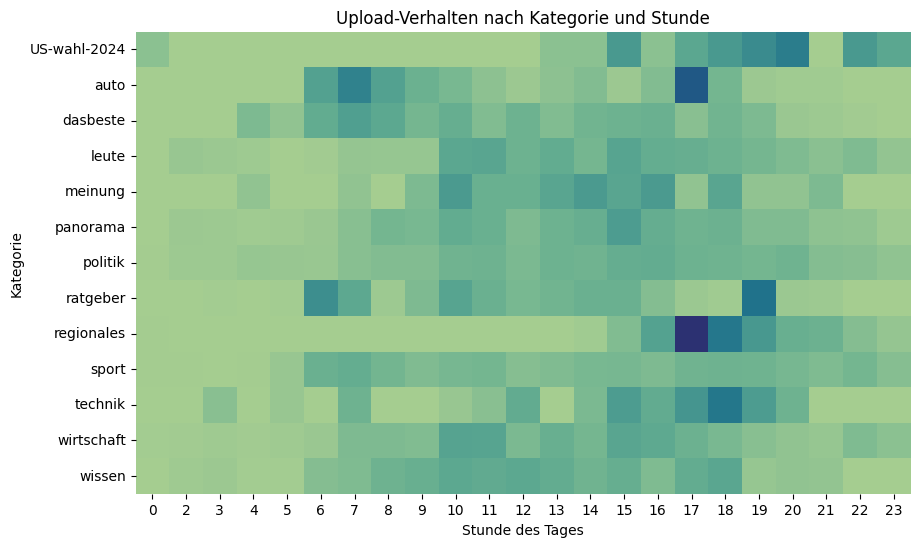

In [13]:
create_heatmap_plots_for_articles_per_hour_unified(articles)

Das gleiche kann ebenfalls anstatt für die Stunden für die jeweiligen Wochentage erstellt werden. Dazu werden zunächst aus der Spalte `upload` die Wochentage extrahiert und in einer neuen Spalte gespeichert. Da die Pandas-Funktion `dayofweek` nur Zahlen anstatt die entsprechenden Namen zurückgibt, werden die Nummern zu den Bezeichnungen gemapped und die Spalte mit den Bezeichnungen überschrieben.

In [14]:
def create_heatmap_plots_for_articles_per_weekday(articles):
    upload_weekday_counts = articles.groupby(['category', 'weekday']).size().unstack(fill_value=0)
    upload_weekday_counts = upload_weekday_counts.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    for category in upload_weekday_counts.index:
        plt.figure(figsize=(6, 1))
        sns.heatmap(upload_weekday_counts.loc[[category]], annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
        plt.title(f'Upload-Verhalten für Kategorie: {category}')
        plt.xlabel('Wochentag')
        plt.yticks([])
        plt.show()

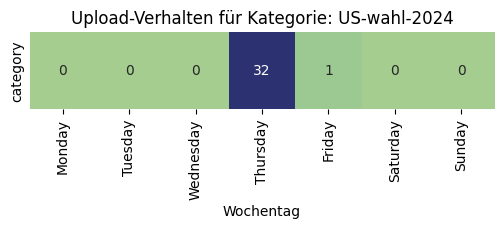

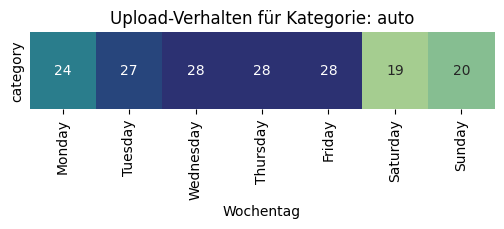

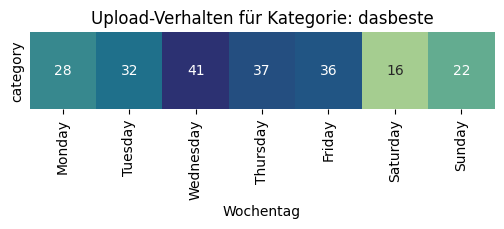

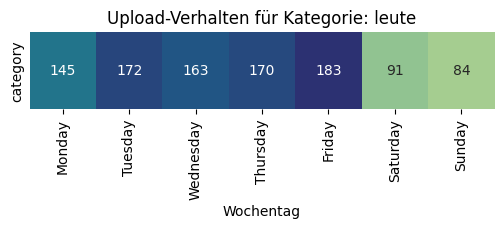

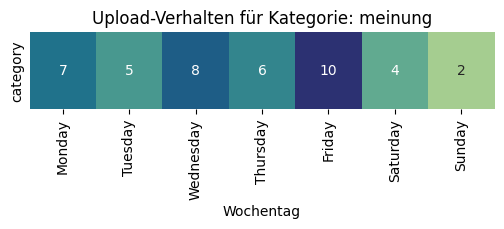

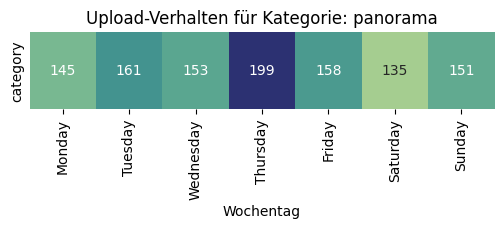

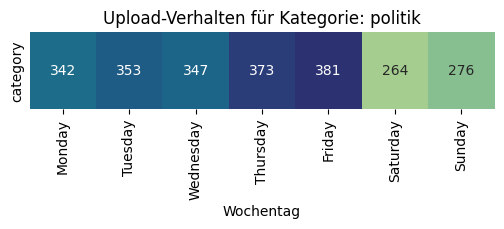

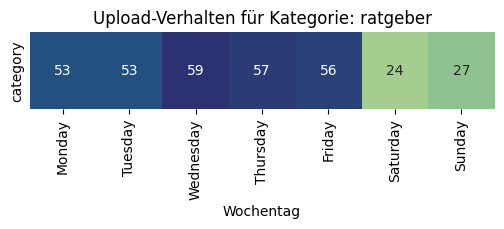

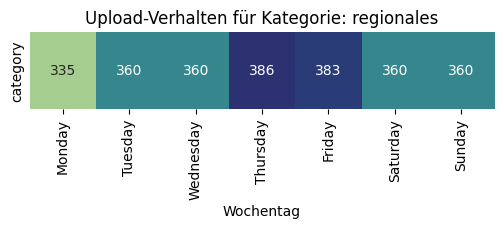

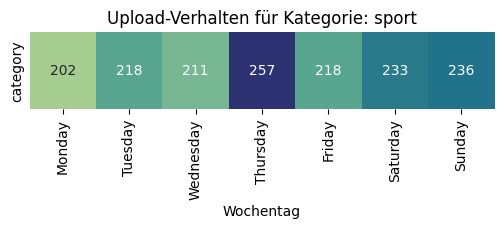

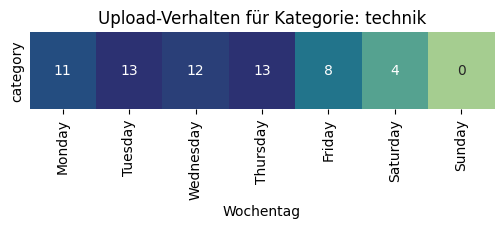

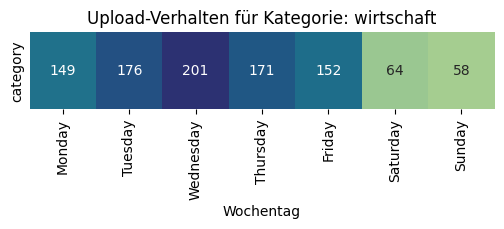

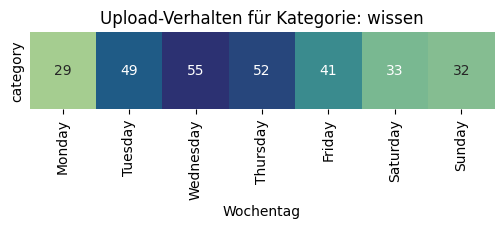

In [15]:
create_heatmap_plots_for_articles_per_weekday(articles)

In [16]:
def create_heatmap_plots_for_articles_per_weekday_unified(articles):
    heatmap_data = articles.groupby(['category', 'weekday']).size().unstack(fill_value=0)
    scaled_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(10, 6))
    sns.heatmap(scaled_heatmap_data, annot=False, cbar=False, rasterized=True, cmap="crest")
    plt.title('Uploads per category and hour')
    plt.xlabel('Weekday')
    plt.ylabel('Category')
    plt.show()

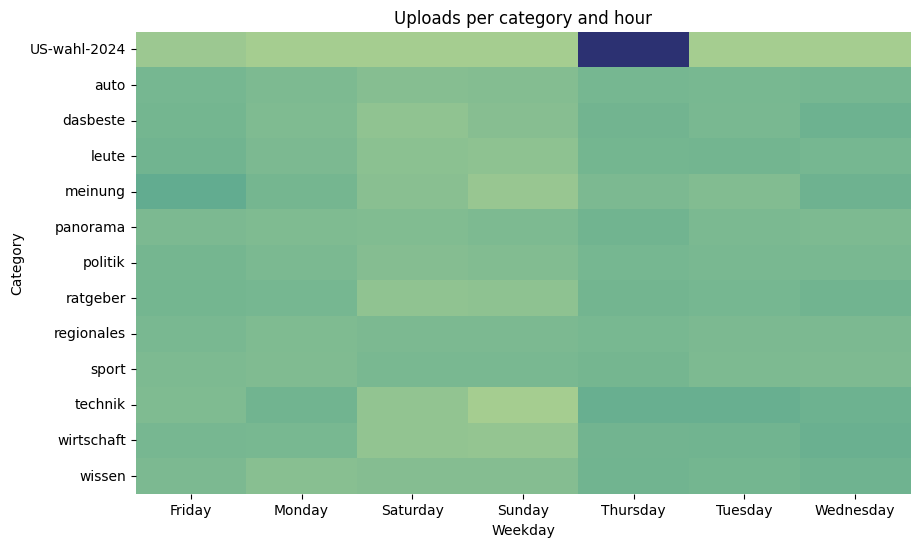

In [17]:
create_heatmap_plots_for_articles_per_weekday_unified(articles)

In [18]:
def create_heatmap_plots_for_articles_per_hour_per_weekday(articles):
    categories = articles['category'].unique()
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = np.arange(0, 24)
    index = pd.MultiIndex.from_product([categories, weekdays, hours], names=['Category', 'Weekday', 'Hour'])
    upload_category_weekday_hour_counts = articles.groupby(['category', 'weekday', 'upload-hour']).size().reindex(index, fill_value=0).unstack(level='Hour')
    upload_category_weekday_hour_counts = upload_category_weekday_hour_counts.reindex(weekdays, level='Weekday')
    for category in categories:
        plt.figure(figsize=(14, 4))
        sns.heatmap(upload_category_weekday_hour_counts.loc[category], annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
        plt.title(f'Upload-Verhalten für Kategorie: {category}')
        plt.xlabel('Stunde des Tages')
        plt.ylabel('Wochentag')
        plt.show()

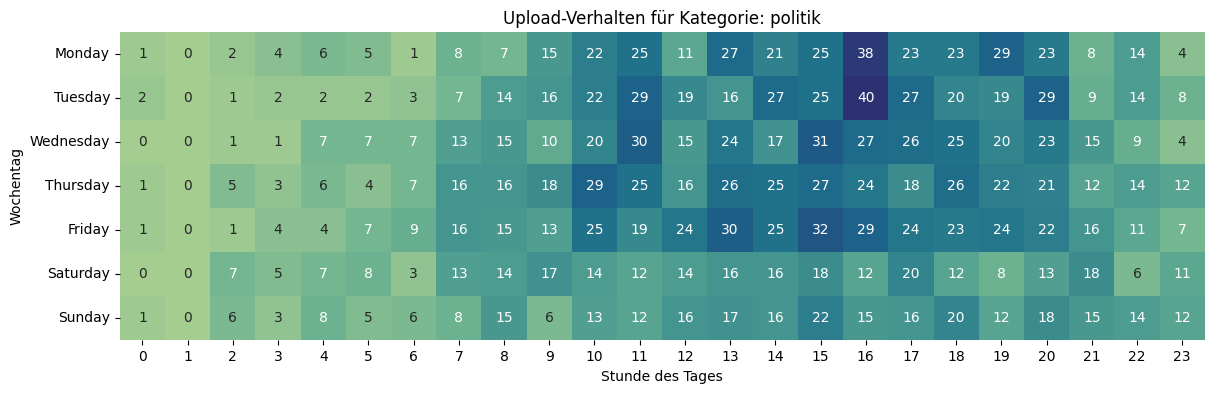

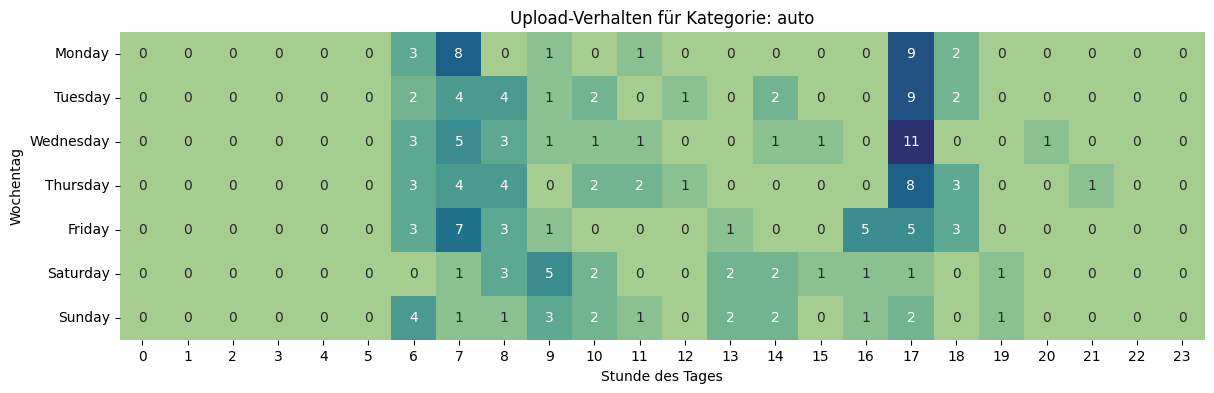

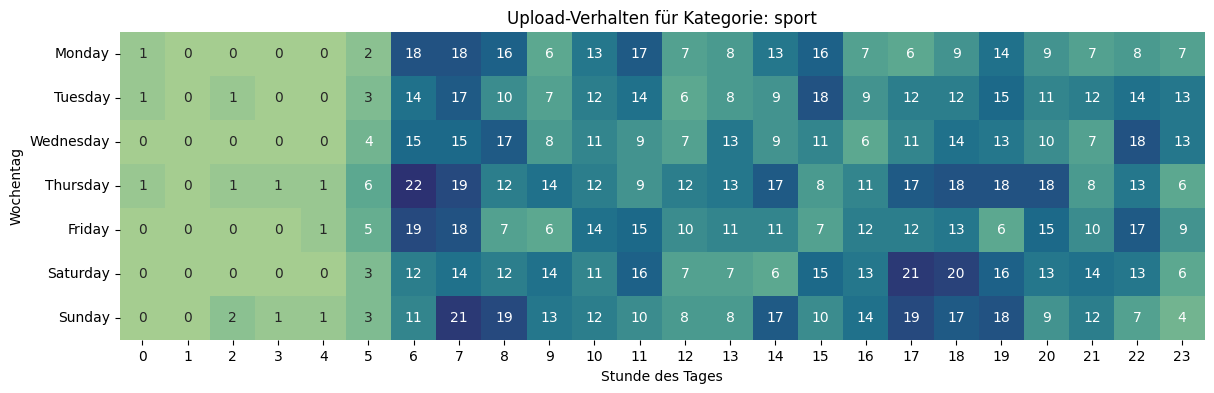

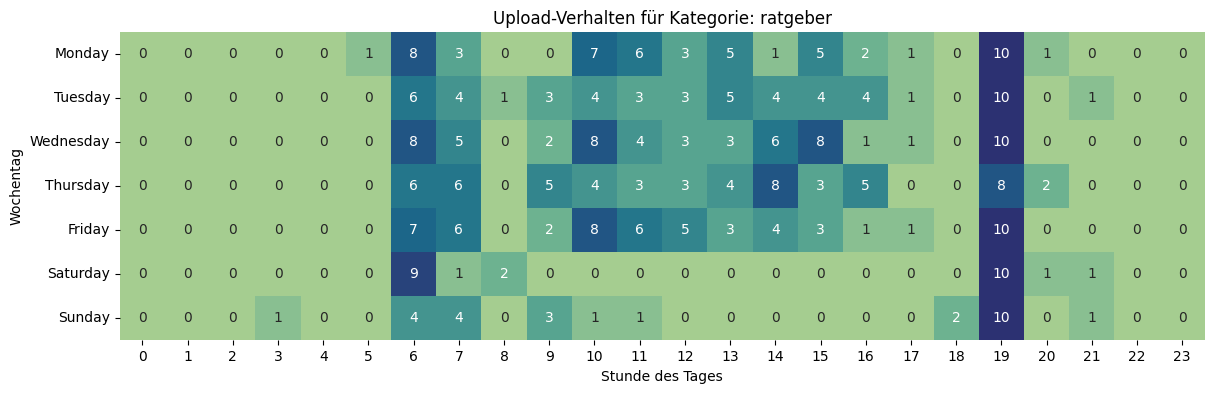

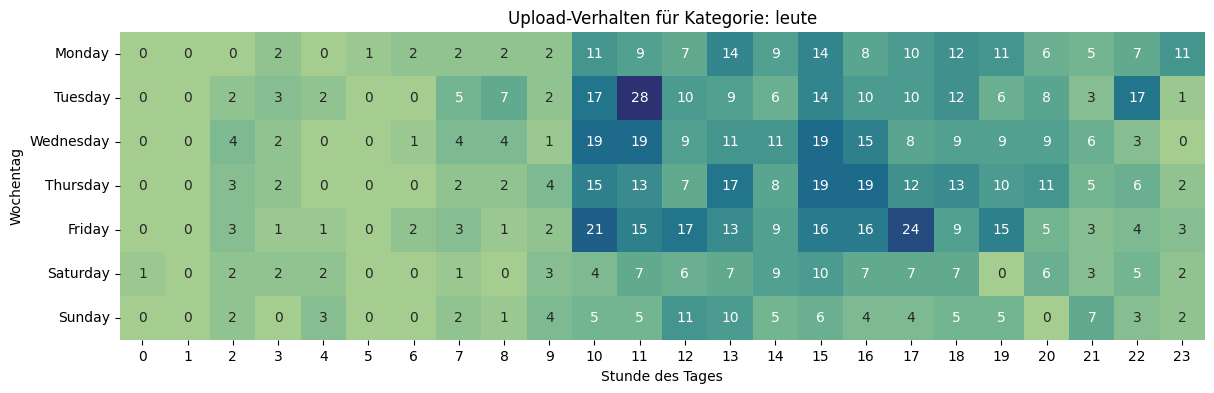

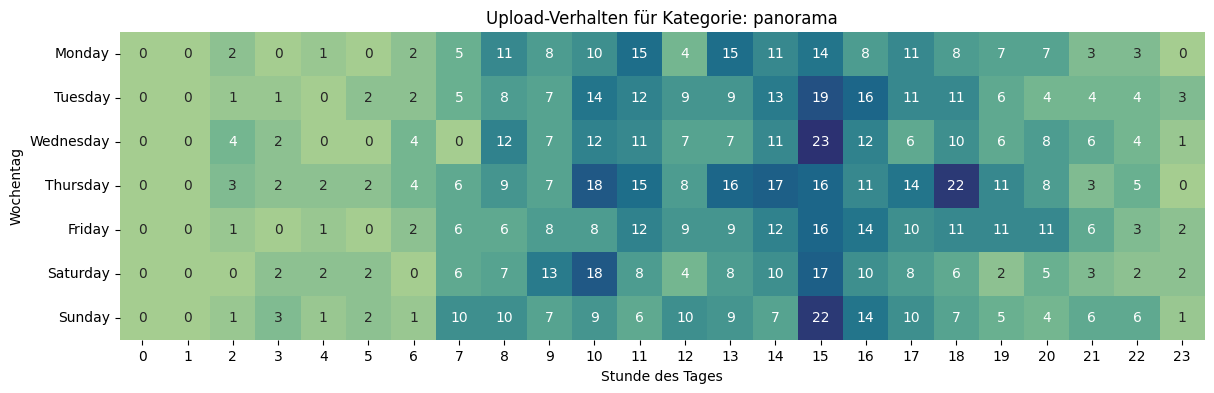

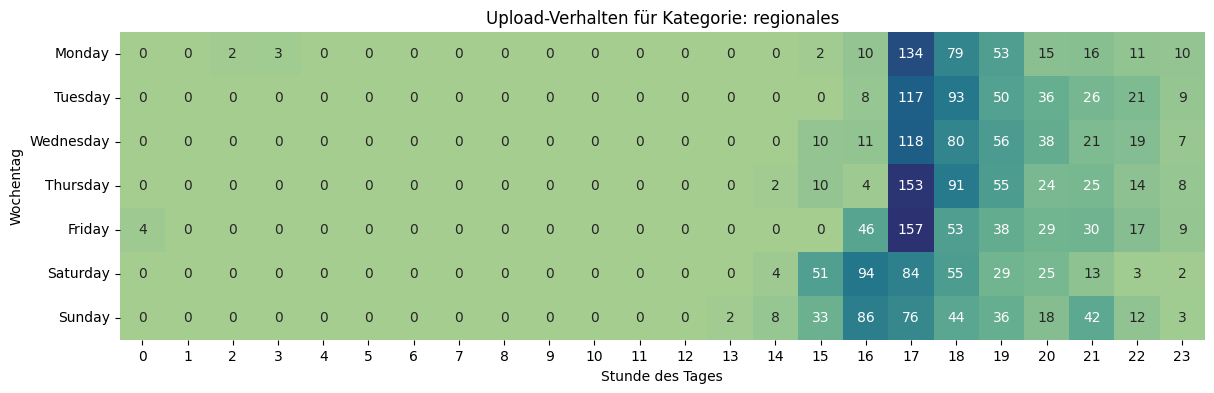

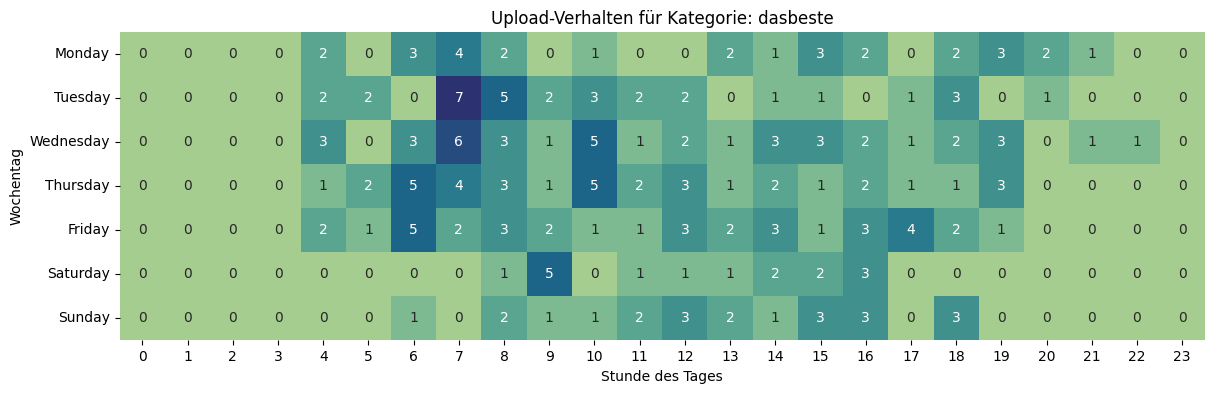

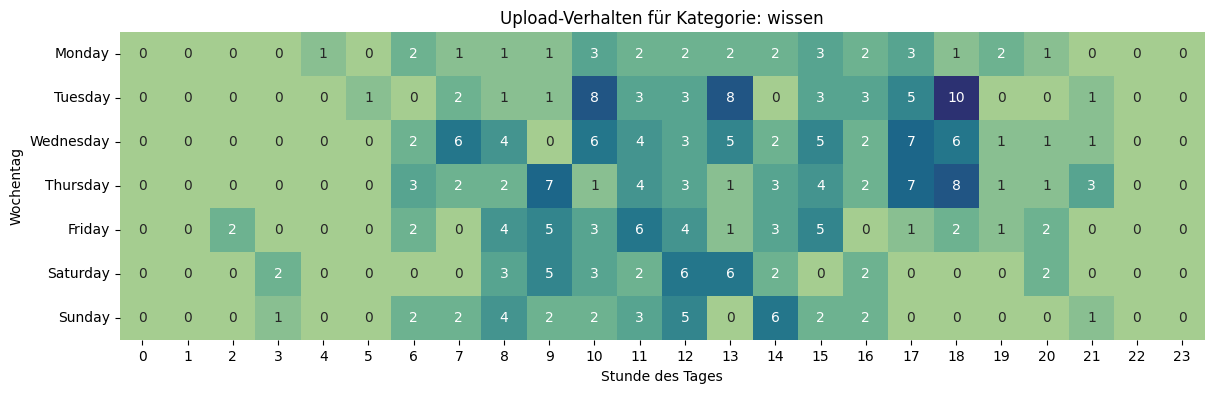

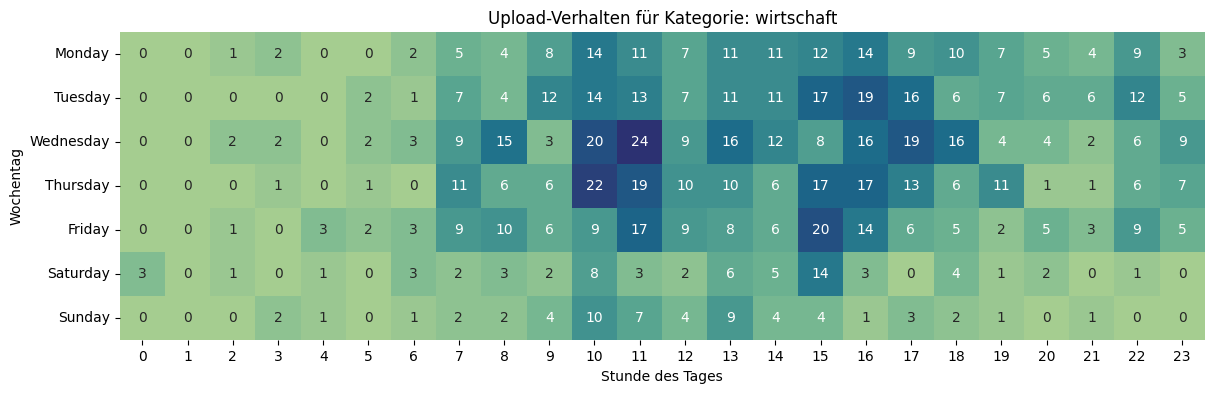

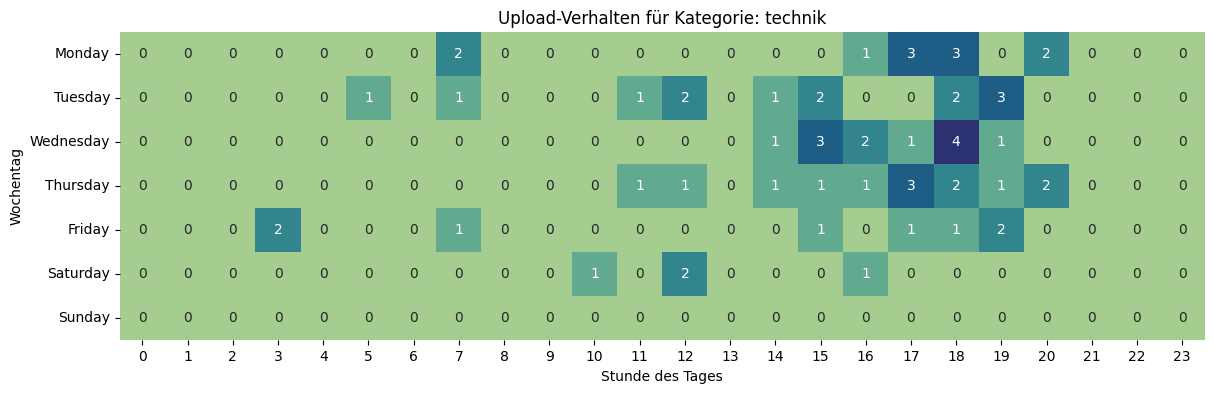

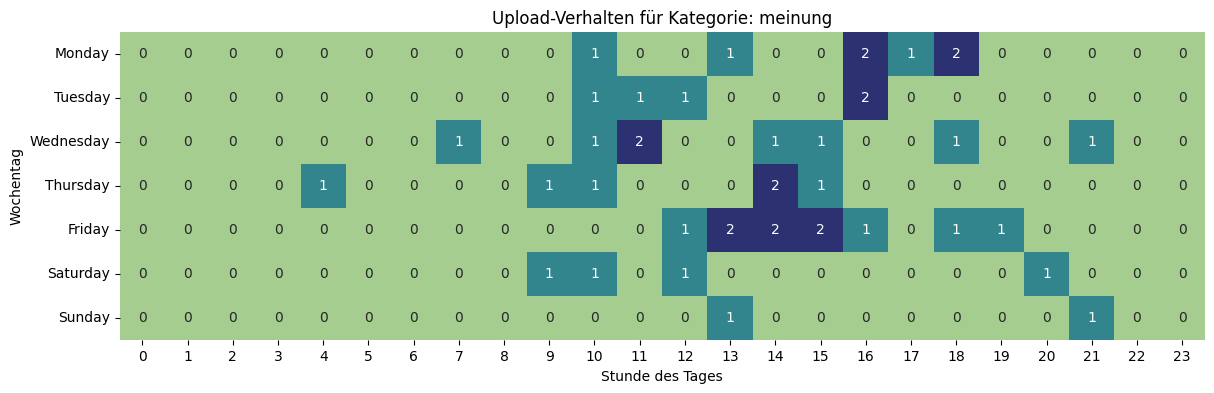

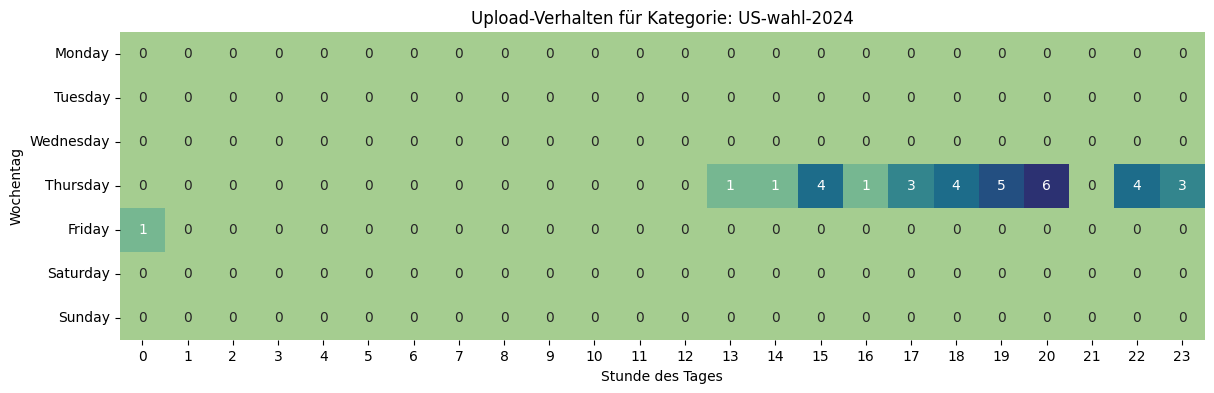

In [19]:
create_heatmap_plots_for_articles_per_hour_per_weekday(articles)